# This next part of the project will be self-guided based on the knowledge of the dataframe/example provided by the video to show more knowledge of code and the mindset of a data analyst.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.express as px



In [2]:
pwd = os.getcwd()

In [3]:
author_data = pd.read_csv(pwd + "/author_info.csv")
game_dataset = pd.read_csv( pwd + '/game_info.csv'   )
purchase_dataset = pd.read_csv( pwd + '/purchase_info.csv'  )
review_dataset = pd.read_csv( pwd + '/review_info.csv')
author_data

/var/folders/yk/bd143n2d1233yn6yphs1_q1c0000gn/T/ipykernel_6773/3506857297.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  author_data = pd.read_csv(pwd + "/author_info.csv")


,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,68675252,76561198199699706,56,3,5552,0,5517.0,1588774891
1,68675154,76561198320854803,112,8,33707,0,27915.0,1593309535
2,68674806,76561198282201987,17,9,3166,0,2633.0,1603555062
3,68673945,76561199016358734,3,2,6579,0,3569.0,1608999345
4,68673504,76561198125284145,1001,46,199,0,65.0,1590811471
...,...,...,...,...,...,...,...,...
999995,47310228,76561198102901681,434,11,1173,0,748.0,1544726959
999996,47310217,76561198062222284,408,13,13,0,13.0,1543945455
999997,47310195,76561198053327292,258,30,755,0,298.0,1593884179
999998,47310155,76561198049307281,20,8,3412,0,1463.0,1601999866


In [4]:
merged_dataset = pd.merge( author_data , game_dataset , how = 'left' , on = 'review_id')
merged_dataset_two = pd.merge( merged_dataset , purchase_dataset , how = 'left' , on = 'review_id')
merged_dataset_three = pd.merge(merged_dataset_two , review_dataset , how = 'left' , on = 'review_id')
dataset = merged_dataset_three.copy()



# When examining the dataset, a column that can be important is the language column since we may want to focus on a specific region, therefore we may want to limit the reviewers/users to those that speak the primary languages of that region. 

Let's say we want to run this promotional program in the States, by giving the top reviewers of the platform certain perks as a way of thanking them for using our platform. Therefore, we may want to choose the top 5 languages spoken in the USA and continue using the same criteria for a top reviewer.

In [5]:
dataset

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,app_id,app_name,...,written_during_early_access,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
0,68675252,76561198199699706,56,3,5552,0,5517.0,1588774891,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,russian,"Божечки, это же 10/10",1588772815,1588772815,True,0,0,0.000000,0
1,68675154,76561198320854803,112,8,33707,0,27915.0,1593309535,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"What can I say, the best game ever?\nThe BEST ...",1588772690,1588772690,True,0,0,0.000000,0
2,68674806,76561198282201987,17,9,3166,0,2633.0,1603555062,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,good,1588772228,1591709306,True,1,0,0.523810,0
3,68673945,76561199016358734,3,2,6579,0,3569.0,1608999345,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,russian,WDPSLDFLZLD\n,1588771138,1588771138,True,0,0,0.000000,0
4,68673504,76561198125284145,1001,46,199,0,65.0,1590811471,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,schinese,Pretty cool game;haven't played it much though.,1588770601,1588770601,True,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47310228,76561198102901681,434,11,1173,0,748.0,1544726959,517630,Just Cause 4,...,False,english,Its rly not that bad.,1544024434,1544024434,True,0,1,0.478261,0
999996,47310217,76561198062222284,408,13,13,0,13.0,1543945455,517630,Just Cause 4,...,False,french,Aucune option pour changer le FOV (qui doit êt...,1544024395,1544024395,False,20,4,0.521904,0
999997,47310195,76561198053327292,258,30,755,0,298.0,1593884179,517630,Just Cause 4,...,False,russian,В игре многое поправили. Исправили кучу всего ...,1544024314,1552200696,True,0,0,0.514576,0
999998,47310155,76561198049307281,20,8,3412,0,1463.0,1601999866,517630,Just Cause 4,...,False,english,i love it ahhhhhhhhhhhhhhhhhh,1544024176,1544024176,True,0,1,0.478723,0


In [6]:
dataset['language'].unique()

# All the different languages in the dataset. 

array(['russian', 'english', 'schinese', 'spanish', 'german', 'french',
       'japanese', 'brazilian', 'koreana', 'italian', 'polish',
       'hungarian', 'danish', 'latam', 'turkish', 'norwegian', 'tchinese',
       'dutch', 'swedish', 'portuguese', 'czech', 'ukrainian', 'finnish',
       'romanian', 'thai', 'vietnamese', 'bulgarian', 'greek'],
      dtype=object)

In [7]:
dataset.groupby('language')['review_id'].count().to_frame('total').reset_index().sort_values(by = 'total' , ascending = False)
# We see which language has the msot reviews.

,language,total
5,english,490963
20,schinese,151357
19,russian,86613
8,german,46756
7,french,34168
13,koreana,31095
21,spanish,30899
0,brazilian,27965
25,turkish,21320
16,polish,18030


# We will choose the top 5 languages spoken in the USA.

 source : https://en.wikipedia.org/wiki/Languages_of_the_United_States 

In [8]:
language_na = ["english","spanish","schinese","vietnamese","french"]

In [9]:
na_region = dataset[dataset['language'].isin(language_na)]
na_region


,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,app_id,app_name,...,written_during_early_access,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
1,68675154,76561198320854803,112,8,33707,0,27915.0,1593309535,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"What can I say, the best game ever?\nThe BEST ...",1588772690,1588772690,True,0,0,0.000000,0
2,68674806,76561198282201987,17,9,3166,0,2633.0,1603555062,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,good,1588772228,1591709306,True,1,0,0.523810,0
4,68673504,76561198125284145,1001,46,199,0,65.0,1590811471,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,schinese,Pretty cool game;haven't played it much though.,1588770601,1588770601,True,0,0,0.000000,0
5,68673403,76561198270161210,35,4,401,0,401.0,1586808634,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"Skyrim, for me, is one of the greatest games e...",1588770478,1588770478,True,1,0,0.523810,0
6,68672722,76561198058209736,67,8,7098,0,4287.0,1598825543,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,Hands down best game of all time. iGN 10/10,1588769597,1588769597,True,0,1,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,47310257,76561198078912845,77,6,487,0,442.0,1544982255,517630,Just Cause 4,...,False,schinese,答主简单说一下自己的心路历程。\n\n从凌晨1点左右游戏解锁开始，我兴奋的打开游戏，握草！这...,1544024538,1544024538,False,1,0,0.000000,0
999995,47310228,76561198102901681,434,11,1173,0,748.0,1544726959,517630,Just Cause 4,...,False,english,Its rly not that bad.,1544024434,1544024434,True,0,1,0.478261,0
999996,47310217,76561198062222284,408,13,13,0,13.0,1543945455,517630,Just Cause 4,...,False,french,Aucune option pour changer le FOV (qui doit êt...,1544024395,1544024395,False,20,4,0.521904,0
999998,47310155,76561198049307281,20,8,3412,0,1463.0,1601999866,517630,Just Cause 4,...,False,english,i love it ahhhhhhhhhhhhhhhhhh,1544024176,1544024176,True,0,1,0.478723,0


# Lets see what the timestamp columns are about. 

In [10]:
dates = na_region[['timestamp_created','timestamp_updated']]
dates


,timestamp_created,timestamp_updated
1,1588772690,1588772690
2,1588772228,1591709306
4,1588770601,1588770601
5,1588770478,1588770478
6,1588769597,1588769597
...,...,...
999994,1544024538,1544024538
999995,1544024434,1544024434
999996,1544024395,1544024395
999998,1544024176,1544024176


In [11]:
from datetime import datetime
# pd.to_datetime(dates['timestamp_created']).reset_index()

dates['timestamp_created'] = pd.to_datetime(dates['timestamp_created']).dt.date
dates['timestamp_updated'] = pd.to_datetime(dates['timestamp_updated']).dt.date

dates


/var/folders/yk/bd143n2d1233yn6yphs1_q1c0000gn/T/ipykernel_6773/670156793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['timestamp_created'] = pd.to_datetime(dates['timestamp_created']).dt.date
/var/folders/yk/bd143n2d1233yn6yphs1_q1c0000gn/T/ipykernel_6773/670156793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['timestamp_updated'] = pd.to_datetime(dates['timestamp_updated']).dt.date


,timestamp_created,timestamp_updated
1,1970-01-01,1970-01-01
2,1970-01-01,1970-01-01
4,1970-01-01,1970-01-01
5,1970-01-01,1970-01-01
6,1970-01-01,1970-01-01
...,...,...
999994,1970-01-01,1970-01-01
999995,1970-01-01,1970-01-01
999996,1970-01-01,1970-01-01
999998,1970-01-01,1970-01-01


It seems like the entries in the timestamp columns are the same, therefore we will ignore this column. 



# Top NA reviewers

In [12]:
na_region.columns

Index(['review_id', 'author_steamid', 'author_num_games_owned',
       'author_num_reviews', 'author_playtime_forever',
       'author_playtime_last_two_weeks', 'author_playtime_at_review',
       'author_last_played', 'app_id', 'app_name', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'language',
       'review', 'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count'],
      dtype='object')

In [13]:
top_na = na_region.groupby("author_steamid").agg({'review_id':'count','votes_helpful':'sum'}).reset_index()
top_na.sort_values(by = ['review_id','votes_helpful'],  ascending = [False,False])

,author_steamid,review_id,votes_helpful
459463,76561198315585536,22,1067
181611,76561198062813911,19,27
142974,76561198045381877,17,57
376596,76561198192166873,15,777
13097,76561197970761123,12,57
...,...,...,...
650165,76561199052113363,1,0
650168,76561199052780912,1,0
650169,76561199053107833,1,0
650170,76561199053289846,1,0


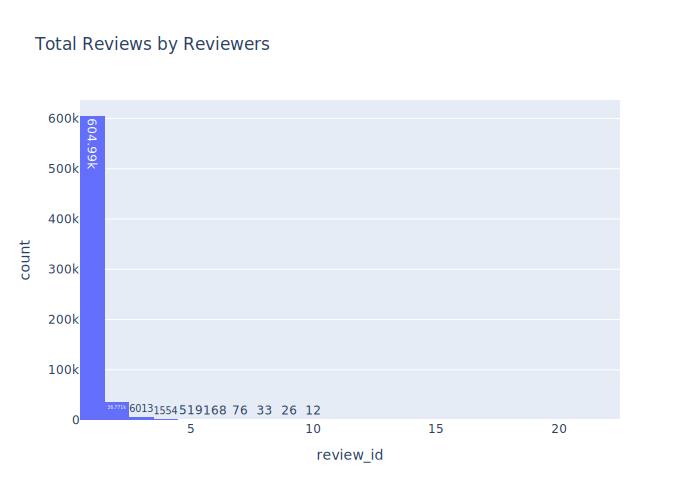

In [29]:
import plotly.express as px

fig = px.histogram(top_na , x = 'review_id' , title=   "Total Reviews by Reviewers" , text_auto = True)
fig.show("svg")


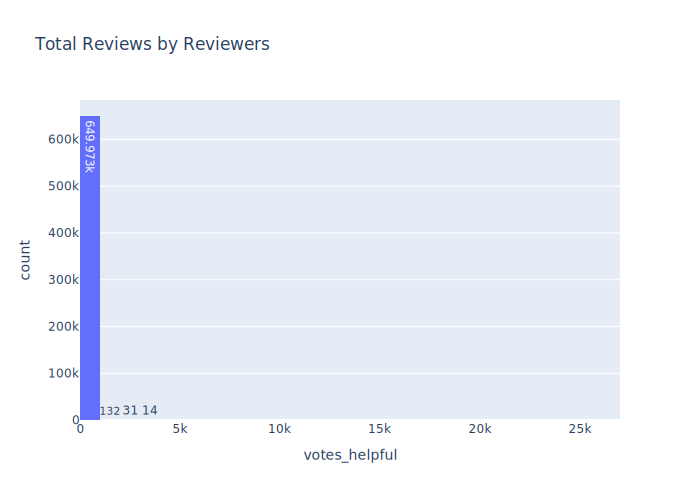

In [31]:
import plotly.express as px

fig = px.histogram(top_na , x = 'votes_helpful' , nbins = 40, title=   "Total Reviews by Reviewers", text_auto = True)
fig.show("svg")


Looking at the histograms, we see that most of the reviewers only created a single review and many gained between 0-999 upvotes. 



In [16]:
a = 400 
b = 3 

In [17]:
steamid = top_na[   (top_na['votes_helpful'] >= a) & (top_na['review_id'] >= b)   ]['author_steamid']
# find the users that are under the limitation above and set them equal to steamid
na_top_reviewers = na_region[na_region['author_steamid'].isin(steamid)]
# get data where author_steamid is in the dataframe steamid which finds the top reviewers. 
na_top_reviewers


,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,app_id,app_name,...,written_during_early_access,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
65886,35976053,76561198117201776,120,99,18412,0,63.0,1535694050,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"Skyrim will always be a great game, but the ""r...",1508881998,1508881998,False,7,0,0.448111,0
66015,35919655,76561198053251883,355,27,3234,0,11.0,1571847037,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,[Content is locked. Pay 500 CC credits to read...,1508676490,1508676490,False,893,761,0.795010,20
67872,35432375,76561198027141250,1428,135,15680,0,3564.0,1594430912,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"Skyrim was a great game, but it's almost 6 yea...",1506994267,1523745155,False,7,0,0.497772,0
68627,35244458,76561197961038549,4745,241,20024,0,8049.0,1554362372,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,Great game (not as good as Oblivion mind you) ...,1506528193,1506528193,False,910,8,0.861982,8
70210,34829972,76561198046478440,118,67,1058,0,420.0,1504927915,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,Why are you reading reviews for this great gam...,1504936500,1505283988,True,5,0,0.552030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981135,57535307,76561198192166873,2349,530,157,0,90.0,1574344946,701160,Kingdom Two Crowns,...,False,schinese,[b][quote]欢迎订阅我的「个人鉴赏家[url=https://store.steam...,1574262671,1574262671,True,8,12,0.621079,0
983061,47485053,76561198040884867,1858,903,446,0,325.0,1545181081,701160,Kingdom Two Crowns,...,False,english,[b]The [i]Kingdom[/i] series has always had a ...,1544629977,1544630167,True,44,2,0.795707,16
993364,56720280,76561198315585536,1350,1105,43,0,6.0,1573267155,517630,Just Cause 4,...,False,english,­,1573162869,1573162869,True,46,7,0.405999,0
993399,56654620,76561198027141250,1428,135,3767,0,827.0,1577301289,517630,Just Cause 4,...,False,english,I'm really torn on writing this review. Just C...,1573075860,1573673723,True,461,18,0.947325,41


# We now have the data for the top reviewers in NA. 

The column indicating if the reviewer obtained early access may be useful when choosing the top reviewers since those with early access may bring more attention to our platform since some people may look towards reviews before the game's official release to decide if they will purchase the game or not.


In [18]:
early_access = na_top_reviewers[  na_top_reviewers['written_during_early_access'] == True ]
# We can use the masking methods above to show who are top reviewers. 
early_access

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,app_id,app_name,...,written_during_early_access,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
187367,14435877,76561197989746995,844,381,1351,0,761.0,1570058197,262060,Darkest Dungeon®,...,True,schinese,又是一款无限受苦的游戏,1423674378,1423674378,True,11,3,0.641557,0
280365,42368052,76561198116100475,2409,317,3114,0,1248.0,1528653229,681660,Bless Online,...,True,english,I was a Founder Supporter. Now I requested a r...,1527623073,1527680204,False,476,49,0.771147,0
639592,40580844,76561198103248913,320,136,310,0,237.0,1521285060,619080,SOS,...,True,schinese,这个差评是给部分中国玩家群体的，不是给游戏的。\n没错，是中国玩家群体。\n\n国服始终还是...,1520235604,1520240401,False,3634,198,0.942915,114
640756,39972277,76561198081631374,1341,246,4754,0,3138.0,1548856039,619080,SOS,...,True,schinese,首先想说一哈 我玩儿这个游戏的时候这个游戏几乎没有国人\n现在国人大量涌入 我只希望有的国人...,1518253654,1519796431,True,1553,180,0.975878,19
667063,43637100,76561197964542705,364,76,14398,0,8230.0,1595278916,666140,My Time At Portia,...,True,english,Awesome game tbh. I have had so much fun since...,1532065958,1532065958,True,0,0,0.000000,0
667391,43285955,76561198103248913,320,136,2733,0,1802.0,1547597477,666140,My Time At Portia,...,True,schinese,其实金吉尔是个女魔头，她暗中修炼一种只有夜晚才能出门的邪派功法.....因此玩家会在晚上半夜...,1530673706,1531246689,True,16,10,0.602202,4
672231,39570707,76561198320798679,340,87,78,0,69.0,1547302361,666140,My Time At Portia,...,True,schinese,辣鸡游戏，玩得太专注，害我煮菜忘记关火。\n\n步入正题，由于优化不是很好，比较卡，所以游戏...,1516757623,1516760729,True,133,88,0.884787,1
686926,44541760,76561198001507954,2966,300,28,0,28.0,1535938972,585420,Trailmakers,...,True,english,[h1]Trailmakers[/h1]\n\nVehicle constructor ga...,1535941380,1535941469,True,28,2,0.704437,0
690046,41878151,76561198141178443,3149,103,45,0,45.0,1511003945,405710,Staxel,...,True,schinese,一直都很喜欢这种风格，可爱又童真，蛮喜欢里面很多NPC的造型。\n\n[spoiler]作为...,1525571397,1525571397,True,397,20,0.971330,8
690167,40849723,76561198001507954,2966,300,1263,0,1263.0,1521208233,405710,Staxel,...,True,english,[h1]Staxel[/h1]\n\nAnother wonderful slice-of-...,1521210541,1521212547,True,31,0,0.689317,3


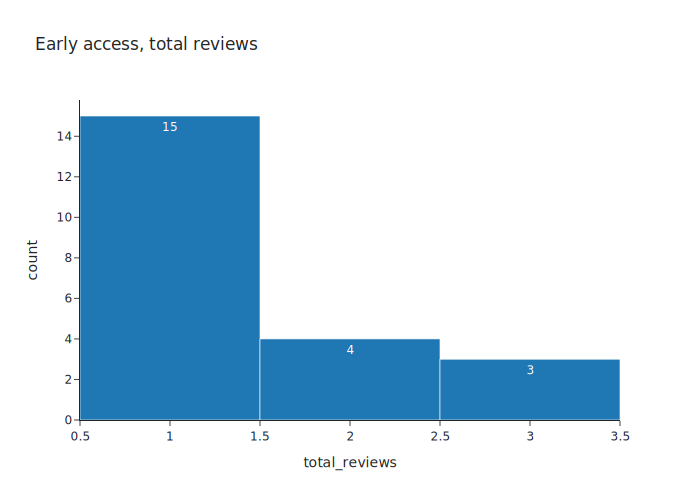

In [46]:
import plotly.express as px

na_reviews_count = early_access.groupby('author_steamid')['review_id'].count().to_frame('total_reviews').reset_index()
fig = px.histogram(na_reviews_count ,x = 'total_reviews' , template='simple_white',  title = 'Early access, total reviews' , text_auto = True )
fig.show("svg")



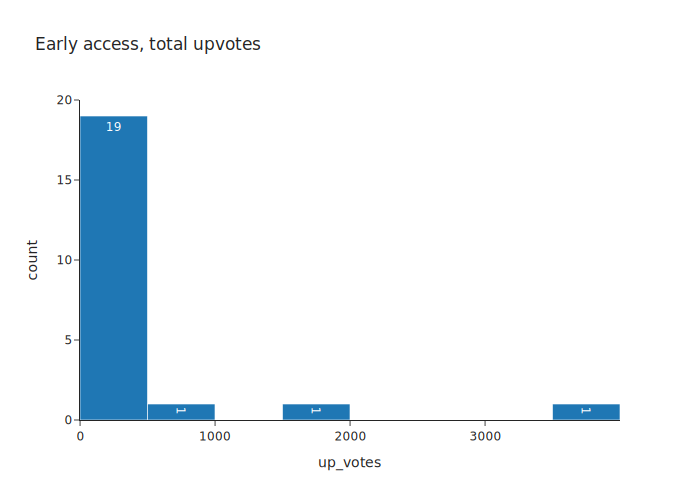

In [43]:
import plotly.express as px

na_reviews_count = early_access.groupby('author_steamid')['votes_helpful'].sum().to_frame('up_votes').reset_index()
fig = px.histogram(na_reviews_count ,x = 'up_votes' ,template = 'simple_white' , title = 'Early access, total upvotes',text_auto=True)
fig.show("svg")


 # Analysis of reviewers that had no early access.


In [21]:
regular_access = na_top_reviewers[  na_top_reviewers['written_during_early_access'] == False ]
regular_access

,review_id,author_steamid,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played,app_id,app_name,...,written_during_early_access,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
65886,35976053,76561198117201776,120,99,18412,0,63.0,1535694050,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"Skyrim will always be a great game, but the ""r...",1508881998,1508881998,False,7,0,0.448111,0
66015,35919655,76561198053251883,355,27,3234,0,11.0,1571847037,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,[Content is locked. Pay 500 CC credits to read...,1508676490,1508676490,False,893,761,0.795010,20
67872,35432375,76561198027141250,1428,135,15680,0,3564.0,1594430912,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,"Skyrim was a great game, but it's almost 6 yea...",1506994267,1523745155,False,7,0,0.497772,0
68627,35244458,76561197961038549,4745,241,20024,0,8049.0,1554362372,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,Great game (not as good as Oblivion mind you) ...,1506528193,1506528193,False,910,8,0.861982,8
70210,34829972,76561198046478440,118,67,1058,0,420.0,1504927915,489830,The Elder Scrolls V: Skyrim Special Edition,...,False,english,Why are you reading reviews for this great gam...,1504936500,1505283988,True,5,0,0.552030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981135,57535307,76561198192166873,2349,530,157,0,90.0,1574344946,701160,Kingdom Two Crowns,...,False,schinese,[b][quote]欢迎订阅我的「个人鉴赏家[url=https://store.steam...,1574262671,1574262671,True,8,12,0.621079,0
983061,47485053,76561198040884867,1858,903,446,0,325.0,1545181081,701160,Kingdom Two Crowns,...,False,english,[b]The [i]Kingdom[/i] series has always had a ...,1544629977,1544630167,True,44,2,0.795707,16
993364,56720280,76561198315585536,1350,1105,43,0,6.0,1573267155,517630,Just Cause 4,...,False,english,­,1573162869,1573162869,True,46,7,0.405999,0
993399,56654620,76561198027141250,1428,135,3767,0,827.0,1577301289,517630,Just Cause 4,...,False,english,I'm really torn on writing this review. Just C...,1573075860,1573673723,True,461,18,0.947325,41


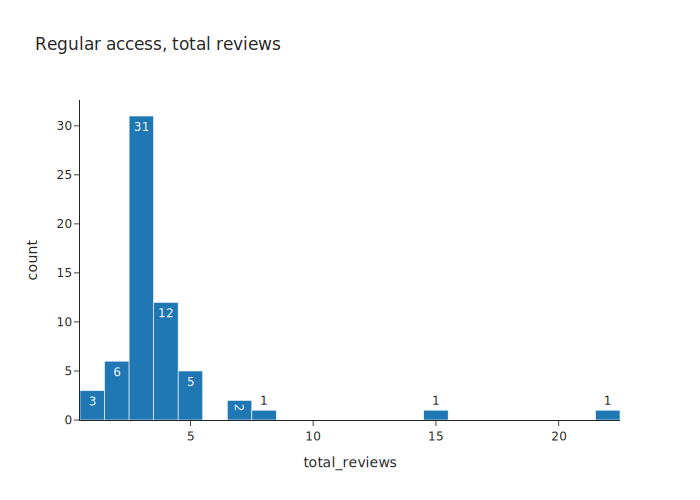

In [26]:
import plotly.express as px

total = regular_access.groupby('author_steamid')['review_id'].count().to_frame('total_reviews').reset_index()

fig = px.histogram(total , x = 'total_reviews' , nbins = 40 ,  template = 'simple_white' , title =  "Regular access, total reviews", text_auto = True)
fig.show("svg")


In [24]:
regular_access.columns

Index(['review_id', 'author_steamid', 'author_num_games_owned',
       'author_num_reviews', 'author_playtime_forever',
       'author_playtime_last_two_weeks', 'author_playtime_at_review',
       'author_last_played', 'app_id', 'app_name', 'steam_purchase',
       'received_for_free', 'written_during_early_access', 'language',
       'review', 'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count'],
      dtype='object')

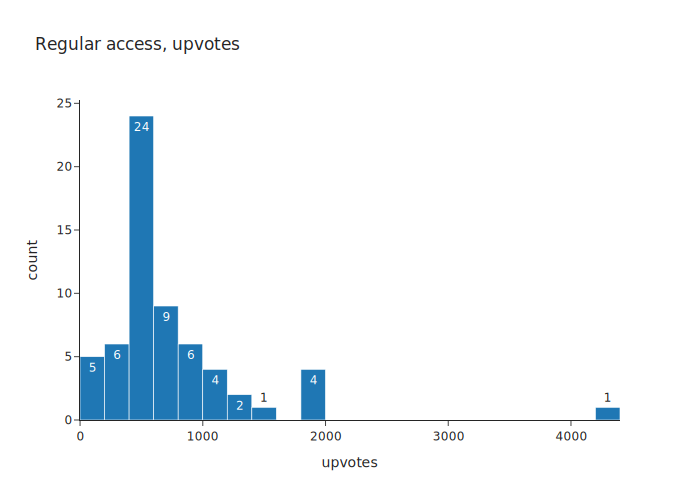

In [47]:
import plotly.express as px

upvotes = regular_access.groupby('author_steamid')['votes_helpful'].sum().to_frame('upvotes').reset_index()

fig = px.histogram(upvotes , x = 'upvotes' , nbins = 40 ,  template = 'simple_white' , title =  "Regular access, upvotes", text_auto = True)
fig.show("svg")


 
The data for the top users in NA that had early access were around the hundreds, so it may be more beneficial to look at reviewers who had no early access as well since by looking at the graphs, reviewers who didn't receive early access received more upvotes. 
